In [1]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
import mygene
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, fminbound
from scipy import stats
from tableanalyzer import *

In [2]:
mg = mygene.MyGeneInfo()

In [3]:
#mg.getgene("ENSG00000221782", 'name,symbol,refseq.rna,type_of_gene,exac.bp')

In [4]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [301]:
len(dirs)

8935

In [7]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes
#df = df.to_sparse(fill_value=0.)
df.head()

,gene,85593c7d-7441-4d41-81d3-aaa17c7e398b.F,bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F,426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F,38083e21-7761-47c7-9112-769c7f85e283.F,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F,21800024-cf76-4185-b57b-526539ccdba2.F,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F,ea50d2da-4f84-46dc-8036-c34392793aed.F,7b2c7499-15c0-4926-a12c-4561df34954b.F,...,bd556315-a050-465f-9a41-bdebe7e3eb61.F,fde7c419-b8c0-4e04-8512-0e3b8eadebda.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,171f664b-3226-4944-9219-91d2a7fdfb5f.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F,234724ab-6f82-4ac9-9948-37ffd9c3e418.F,cd550979-69b5-43d0-9724-cc25eb502cb8.F,03872f69-93f5-4d6c-aeb3-dadbc2762682.F
0,ENSG00000242268,0.076913,0.000000,0.137506,0.841950,0.522683,0.436242,0.062384,0.902013,0.000000,...,0.000000,0.046059,0.027827,0.000000,0.975612,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112,0.007115,0.000000,0.010902,0.025961,0.616454,0.207531,0.025968,0.060075,1.020406,...,0.000000,0.019172,0.003861,0.031637,0.118014,0.000000,0.016449,0.000000,0.003548,0.000000
2,ENSG00000167578,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,2.477979,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,4.201916,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Columns: 5001 entries, gene to 03872f69-93f5-4d6c-aeb3-dadbc2762682.F
dtypes: float64(5000), object(1)
memory usage: 54.3+ MB


In [8]:
ngenes = len(df['gene'])
nfiles = len(df.loc[0,:])-1
print("genes:%d\trealizations:%d"%(ngenes,nfiles))

genes:60483	realizations:5000


In [ ]:
np.sum(df[:,df.keys()[4]])

## Means sigmas

In [6]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
#type_of_gene='protein-coding'
#df_mv = df_mv.loc[df_mv['type_of_gene']==type_of_gene]
#df_mv_occ=pd.read_csv("O.dat", header=None)
#df_mv.drop("type_of_gene", axis=1, inplace=True)
#df_mv.insert(2, 'occurrence', df_mv_occ.values)
df_mv.head()

,mean,type_of_gene,variance,occurrence
ENSG00000167578,3.861120,protein-coding,6.342790,4999
ENSG00000078237,4.459130,protein-coding,17.953300,4998
ENSG00000146083,12.657700,protein-coding,48.880000,5000
ENSG00000158486,0.421868,protein-coding,0.529904,1622
ENSG00000198242,183.391000,protein-coding,18958.500000,4999


In [7]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
occurrences = np.array(df_mv['occurrence'].values, dtype=float)
len(df_mv)

19181

### plot

#### **var** versus **mean**

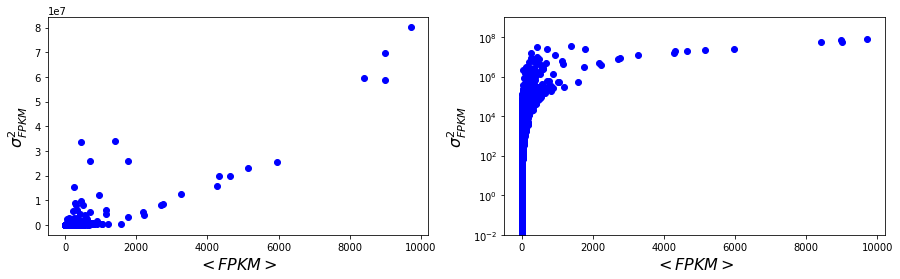

In [9]:
fig=plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.subplot(122)
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e9))
plt.show()

In [10]:
fig.savefig("varmean.png")

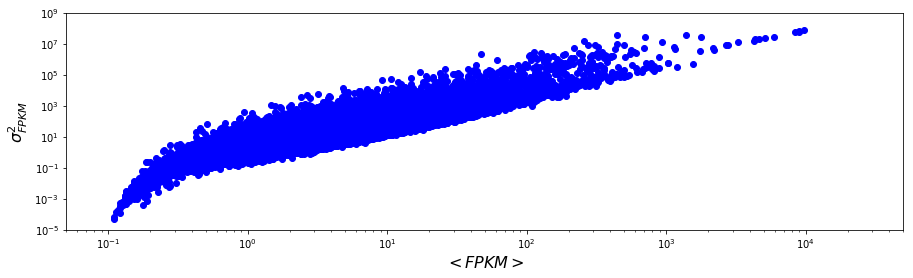

In [11]:
fig=plt.figure(figsize=(15,4))
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-2,5e4)
plt.ylim((1e-5,1e9))
plt.show()
fig.savefig("varmean_loglog.png")

### mean versus occurrence

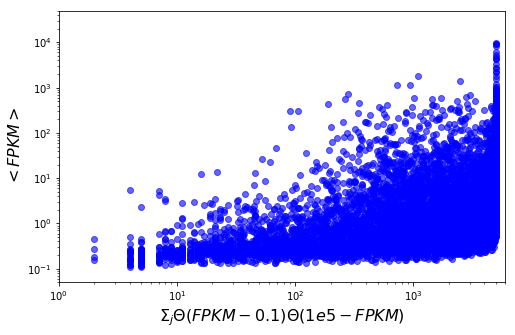

In [14]:
fig=plt.figure(figsize=(8,5))
plt.scatter(occurrences, means, c='b', alpha=0.6)
plt.ylabel("$<FPKM>$", fontsize=16)
plt.xlabel("$\Sigma_j\Theta(FPKM-0.1)\Theta(1e5-FPKM)$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(5e-2,5e4)
plt.xlim(1e0,6e3)
plt.show()

In [15]:
fig.savefig("meanDiff_loglog.png")

### Distributions

In [312]:
len(means)

19369

In [313]:
len(variances)

19369

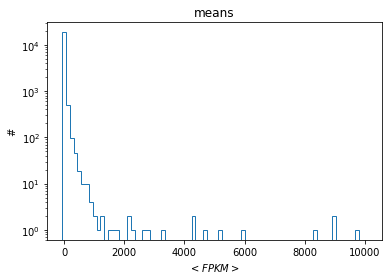

In [314]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(means, density = False, range=_range, bins=bins, histtype='step')
plt.title("means")
plt.xlabel("$<FPKM>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("mean_distr.pdf")

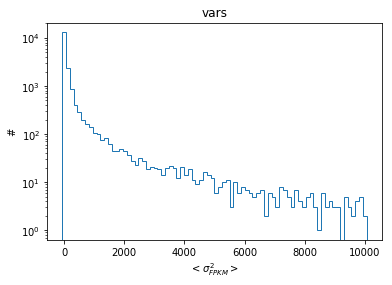

In [315]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(variances, density = False, histtype='step', bins=bins, range=_range)
plt.title("vars")
plt.xlabel("$<\sigma_{FPKM}^2>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("var_distr.pdf")

# protein coding genes

In [ ]:
protein_coding = pd.read_csv("genes.txt", header=[0], index_col=[0])
protein_coding.loc[protein_coding['type_of_gene']=='protein-coding'].index.values

# expression plot

In [ ]:
sample = 10
fig = plt.figure()
x = np.linspace(0, 20000)
key = df.keys()[sample]
plt.plot(df[key].to_dense(), 'o', label=key[:-2])
plt.plot(x, [100 for _ in x], 'r--', lw=4, label='threshold (100)')
plt.xlabel("gene", fontsize=16)
plt.ylabel("FPKM", fontsize=16)
plt.legend()
plt.show()

In [ ]:
fig.savefig("singleFile.pdf")

# single gene

name: ENSG00000221782
FPKM mean:       4.84
FPKM var:     318.49


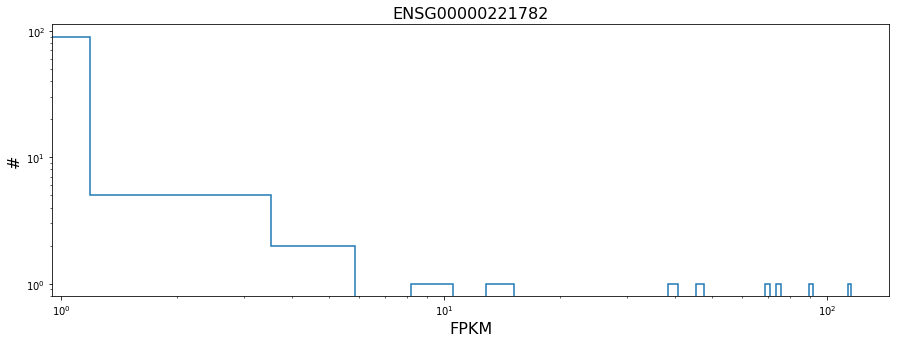

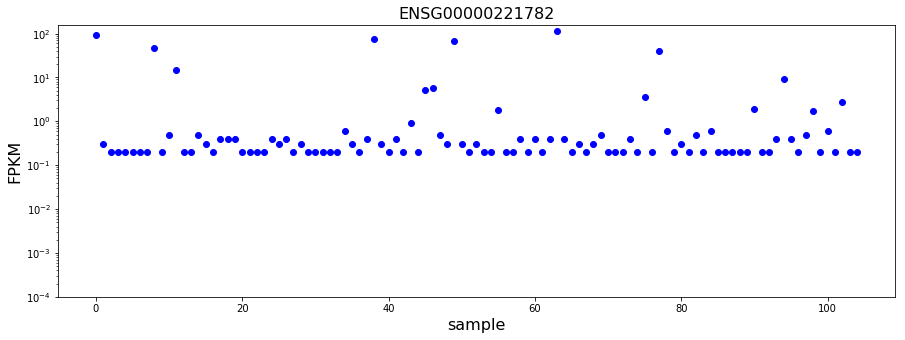

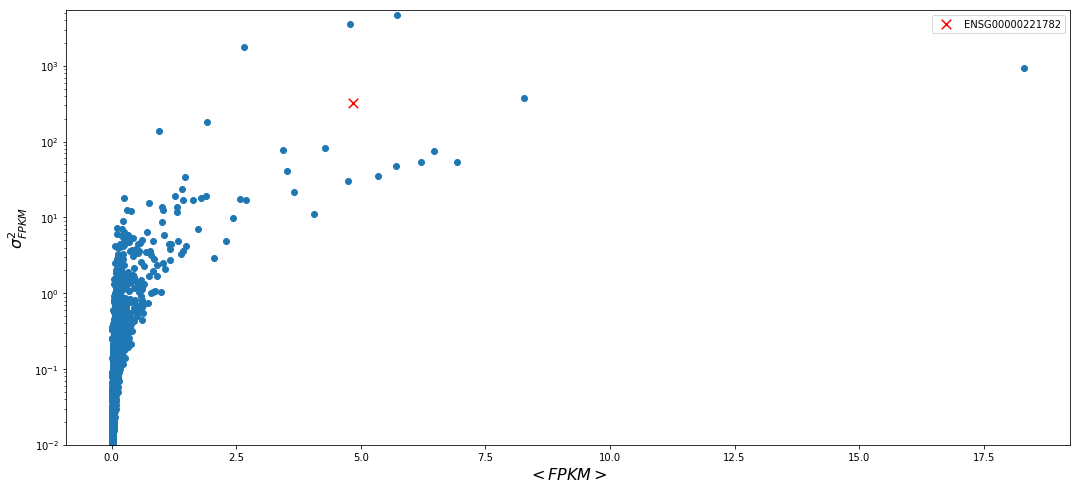

In [29]:
gene = geneinfo('ENSG00000221782', df, nfiles)
genedistr(gene, 50);
geneplot(gene);
genecoord(gene, means, variances);

# subset analysis

#### query genes

In [ ]:
search_mean_max = 200
search_mean_min = 50
search_var_max = 1e12
search_var_min = 1e6
pc = True
if (pc):
    query_result = df_mv.loc[(df_mv['type_of_gene']=='protein-coding')&((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
else:
    query_result = df_mv.loc[((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
query_result

In [ ]:
genesnames = []
for g in query_result.index.values[:15]:
    gene = geneinfo(g[:15], df, nfiles)
    genesnames.append(gene)

### plot coordinates

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
#plt.ylim((1e-5,1e8))
plt.ylim((1e-5,1e10))
plt.legend()
plt.show()
fig.savefig("plot/genes/subset.png")

### plot all

In [ ]:
for gene in genesnames:
    print(gene['name'])
    print("mean: %f"%gene['avg'])
    print("var: %f"%gene['var'])
    genedistr(gene, 80);
    #geneplot(gene);
    #genecoord(gene);

In [ ]:
genename='ENSG00000159763'
gene = geneinfo(genename, df, nfiles)

In [ ]:
def powgaus(x, a, b, c, d, e):
    return np.exp(a*np.power(x,-b)) - 1 + e*(np.exp(np.exp(-(x-c)*(x-c)/d)) - 1)

In [ ]:
fitfunc = powgaus

In [ ]:
xscale = 'linear'
yscale='log'
bins = 30
fig = plt.figure(figsize=(10,4))
ax = fig.subplots()
counts, bin_edges, _ = ax.hist(gene['data'], histtype='step', bins=bins, range=(0,1e4))
bin_centres = (bin_edges[1:]+bin_edges[:-1])/2.
ax.errorbar(bin_centres, counts, np.sqrt(counts), None, 'bo', label='data')
bounds = ([2, 0.3, 3000, 1000, 0.01],[1000, 0.7, 5000, 500000, 3])
popt, pcov = curve_fit(fitfunc, bin_centres, counts, bounds=bounds)
print(popt)
x = np.linspace(bin_centres[0],1e4)
ax.set_title(gene['name'], fontsize=18)
ax.set_xlabel("$FPKM$")
ax.set_ylabel("#")
ax.set_yscale(yscale)
ax.set_xscale(xscale)
minimum = fminbound(fitfunc, 100, 1500, args=(popt[0],popt[1],popt[2],popt[3],popt[4]))
plt.plot(x, fitfunc(x, *popt), 'r', label='fit')
plt.plot(x, np.exp(popt[0]*np.power(x,-popt[1])) - 1, label='$e^{a*x^{-b}}$')
plt.plot(x, popt[4]*np.exp(np.exp(-(x-popt[2])*(x-popt[2])/popt[3])) - popt[4], label="$C(e^{e^{- (x-\mu)^2\sigma^{-2}}}-1)$")
plt.text(0.5, 0.45, 'min: %6.1f'%minimum, horizontalalignment='left',verticalalignment='top', fontsize=16, transform=ax.transAxes)
plt.text(0.5, 0.4, '(a, b, $\mu$, $\sigma$, C):\n(%d, %4.2f, %d, %d, %3.1f)'%(popt[0],popt[1],popt[2],popt[3],popt[4]), horizontalalignment='left',verticalalignment='top', fontsize=16, transform=ax.transAxes)
plt.ylim(1,2e4)
plt.legend(fontsize=14)
plt.show()

In [ ]:
fig.savefig("%s_fit_%s%s.pdf"%(genename, xscale, yscale))

# null

In [ ]:
#df_null = pd.read_csv(("%s/nullTable.csv"%working_dir), header=None, index_col=None)

In [ ]:
#df_null.head()

In [ ]:
#means_null = [np.average(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]
#variances_null = [np.var(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]

## meanVariances

In [317]:
df_mv_null = pd.read_csv("meanVariances_null.csv", usecols=[1,2])
df_mv_null.head()

,mean,variance
0,3.97149,4.108520
1,4.49127,4.837660
2,12.65920,18.240700
3,1.07154,0.085502
4,183.30300,1308.290000


In [318]:
df_occ_null = pd.read_csv("O_null.dat", header=None)
df_mv_null.insert(2,'occurrence', np.array(df_occ_null.values,dtype=float))
df_mv_null.head()

,mean,variance,occurrence
0,3.97149,4.108520,0.9998
1,4.49127,4.837660,0.9992
2,12.65920,18.240700,1.0000
3,1.07154,0.085502,0.2394
4,183.30300,1308.290000,0.9998


In [319]:
means_null = df_mv_null['mean'].values
variances_null = df_mv_null['variance'].values
occurrences_null = np.array(df_mv_null['occurrence'].values, dtype=float)*5000
len(df_mv_null)

19369

In [112]:
x_lin = np.logspace(-1,4, dtype=float)
x = means
y = variances

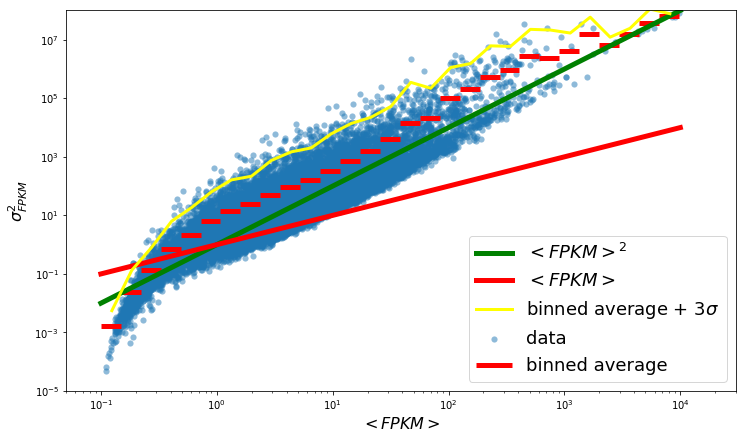

In [113]:
fig=plt.figure(figsize=(12,7))

plt.scatter(x, y, label = 'data', marker='o', alpha=0.5, linewidths=0.1)

log_bins_for_x = np.logspace(-1, np.log10(np.max(x)), num=30)
bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=log_bins_for_x)
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')

plt.plot(x_lin,np.power(x_lin,2), 'g-', lw=5, label='$<FPKM>^2$')
plt.plot(x_lin,x_lin, 'r-', lw=5, label='$<FPKM>$')



#popt, pcov = curve_fit(lambda x,a,b : a*np.power(x,b), bin_centres, bin_means, bounds=([1,1],[35,5]))
#plt.plot(bin_centres, popt[0]*np.power(bin_centres, popt[1]), color='y', lw=3, label='fit')
#print(popt[0],popt[1])

bin_sigmas,  bin_sigmas_edges, binsigmanumber = stats.binned_statistic(x, y, statistic=np.std, bins=log_bins_for_x)
plt.plot((bin_edges[:-1] + bin_edges[1:])/2, bin_means+bin_sigmas*3, lw=3, color='yellow', label='binned average + $3\sigma$')


#plt.scatter(means_null, variances_null, label='sampling')

plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.legend(fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5, 1e8)
plt.xlim(5e-2,3e4)
plt.show()

In [114]:
fig.savefig("varmean_3sigma.png")

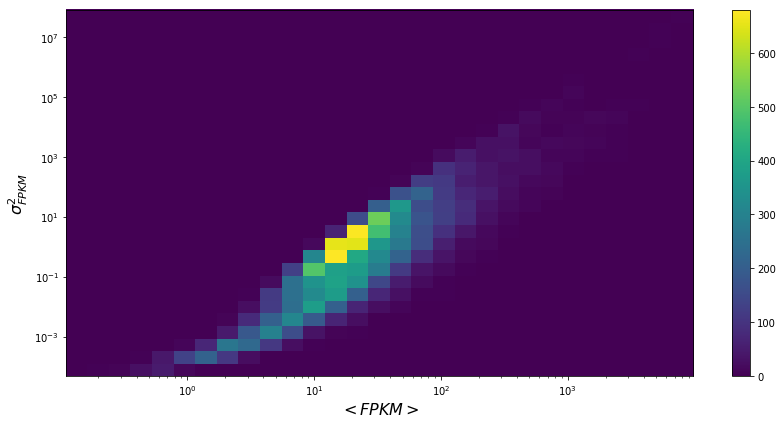

In [138]:
x = means
y = variances

# INIT FIGURE #################################################################

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()


# AX #########################################################################

xmin = np.log10(x.min())
xmax = np.log10(x.max())
ymin = np.log10(y.min())
ymax = np.log10(y.max())

xbins = np.logspace(xmin, xmax, 30) # <- make a range from 10**xmin to 10**xmax
ybins = np.logspace(ymin, ymax, 30) # <- make a range from 10**ymin to 10**ymax

counts, _, _, _ = ax.hist2d(x, y, bins=(xbins, ybins));

pcm = ax.pcolormesh(xbins, ybins, counts)
plt.colorbar(pcm)
#fig.colorbar(pcm, ax=ax2)  # this works too

## The following line doesn't actually work...
## See http://stackoverflow.com/questions/29175093/creating-a-log-linear-plot-in-matplotlib-using-hist2d
#H = ax2.hist2d(x, y, bins=[xbins, ybins])
#fig.colorbar(H[3], ax=ax2)

ax.set_xscale("log")               # <- Activate log scale on X axis
ax.set_yscale("log")               # <- Activate log scale on Y axis

ax.set_xlim(xmin=xbins[0])
ax.set_xlim(xmax=xbins[-1])
ax.set_ylim(ymin=ybins[0])
ax.set_ylim(ymax=ybins[-1])

ax.set_title("")
ax.set_xlabel("$<FPKM>$", fontsize=16)
ax.set_ylabel("$\sigma^2_{FPKM}$", fontsize=16)

# SHOW AND SAVE FILE ##########################################################

plt.tight_layout()
plt.show()
fig.savefig("varmean_density.png")

# overexpressed

In [68]:
def get_mean_sigma(mean):
    bin_i = 0
    for i,edge in enumerate(bin_edges):
        if mean<edge:
            bin_i = i-1
            break
    return(bin_means[bin_i], bin_sigmas[bin_i], mean>(bin_means[bin_i]+6*bin_sigmas[bin_i]))

In [69]:
over = []
for g in df_mv.index:
    subdf = df_mv.loc[g,:]
    mean = subdf['mean']
    r = get_mean_sigma(mean)
    if r[2]:
        over.append(g)

In [70]:
len(over)

46

In [71]:
for g in over:
    print(g)

ENSG00000176020
ENSG00000196098
ENSG00000274611
ENSG00000273976
ENSG00000273514
ENSG00000269437
ENSG00000213648
ENSG00000181625
ENSG00000153684
ENSG00000179615
ENSG00000248167
ENSG00000269955
ENSG00000243207
ENSG00000179407
ENSG00000205670
ENSG00000251349
ENSG00000258724
ENSG00000188629
ENSG00000259288
ENSG00000268350
ENSG00000171116
ENSG00000236637
ENSG00000205029
ENSG00000187701
ENSG00000183246
ENSG00000221900
ENSG00000179304
ENSG00000228049
ENSG00000179412
ENSG00000258817
ENSG00000269405
ENSG00000132207
ENSG00000183979
ENSG00000261052
ENSG00000171489
ENSG00000176748
ENSG00000227717
ENSG00000268221
ENSG00000183791
ENSG00000221874
ENSG00000248919
ENSG00000175143
ENSG00000187664
ENSG00000271567
ENSG00000268738
ENSG00000237850


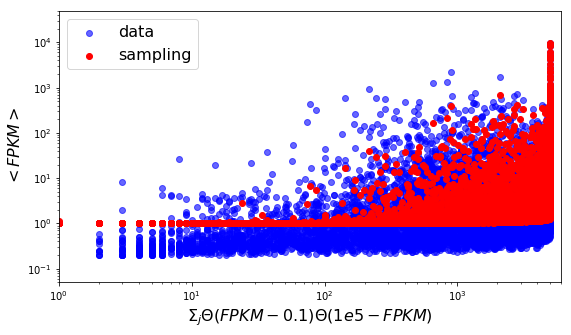

In [325]:
fig=plt.figure(figsize=(9,5))
plt.scatter(occurrences*5000, means, c='b', label='data', alpha=0.6)
plt.scatter(occurrences_null, means_null, c='r', label='sampling')
#plt.plot(np.logspace(-1,4),1e-1/5000.*np.logspace(-1,4))
plt.ylabel("$<FPKM>$", fontsize=16)
plt.xlabel("$\Sigma_j\Theta(FPKM-0.1)\Theta(1e5-FPKM)$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(5e-2,5e4)
plt.xlim(1e0,6e3)
plt.legend(fontsize=16)
plt.show()

In [290]:
fig.savefig("meanDiff.png")

## data size Heaps check

In [ ]:
col = df.loc[:,df.keys()[1]].values
np.sum(col)

In [ ]:
len(col[col.nonzero()])

In [ ]:
x = []
y = []
for i in range(1, 1000):
    col = df.loc[:,df.keys()[i]].values
    x.append(np.sum(col))
    y.append(len(col[col.nonzero()]))
plt.scatter(x,y)